# Project 1
## The Net Wars: Attack of the Bots
### Advanced Machine Learning - MECD (2022/2023)

### Autores

- Duarte Meneses - 2019216949
- Patricia Costa - 2019213995

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

|Class  |Label |
| ----- | ---- | 
|Normal	|0     |
|Dos	|1     |
|R2L	|2     |
|U2R	|3     |
|Probe	|4     |

In [13]:
PATH_TO_DATA = 'dataset/'

test_students = pd.read_csv(PATH_TO_DATA + 'test_students.csv')

train_students = pd.read_csv(PATH_TO_DATA + 'train_students.csv')

[Text(0.5, 1.0, 'Attack Type Distribution')]

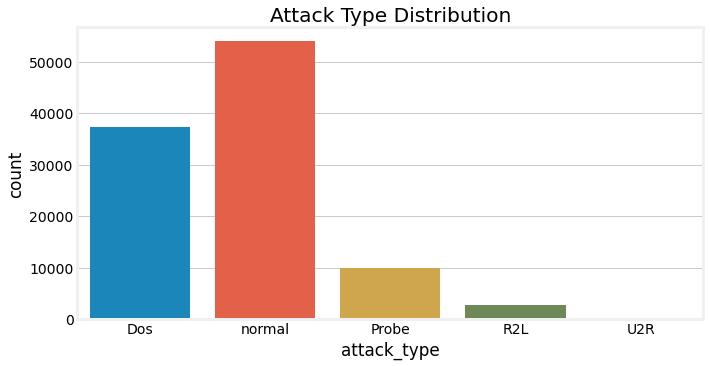

In [14]:
sns.countplot(x=train_students['attack_type'], data=train_students).set(title='Attack Type Distribution')

In [15]:
train_students = pd.get_dummies(train_students, columns=['protocol_type'], drop_first=True)
train_students = pd.get_dummies(train_students, columns=['service'], drop_first=True)
train_students= pd.get_dummies(train_students, columns=['flag'], drop_first=True)

In [16]:
train_students.replace('normal', 0, inplace=True)
train_students.replace('Dos', 1, inplace=True)
train_students.replace('R2L', 2, inplace=True)
train_students.replace('U2R', 3, inplace=True)
train_students.replace('Probe', 4, inplace=True)

In [17]:
y_train = train_students['attack_type']
X_train = train_students.drop('attack_type', axis=1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_t, y_train, y_t = train_test_split(X_train, y_train, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_t, y_t, test_size=0.5, random_state=42)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression(random_state=42)

kfold = KFold(n_splits=10, random_state=42,shuffle = True)
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print("%s: %f (%f)" % ('LR', cv_results.mean(), cv_results.std()))

cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='f1')
print("%s: %f (%f)" % ('LR', cv_results.mean(), cv_results.std()))

LR: 0.814320 (0.005285)
LR: nan (nan)


### SMOTE

from imblearn.over_sampling import SMOTE
from threadpoolctl import threadpool_info

sm = SMOTE(random_state=42)

X_train_s, y_train_s = sm.fit_resample(X_train, y_train)
X_train_s = pd.DataFrame(data=X_train_s ,columns=X_train.columns)
y_train_s= pd.DataFrame(data=y_train_s)

counts = y_train_s.value_counts() / len(y_train_s) * 100

print("Proportions:\n", counts)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train_s)
prediction = lr.predict(X_test)

print(classification_report(y_test, prediction))


c:\Users\emanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.87      0.79      0.83     10812
           1       0.81      0.92      0.86      7472
           2       0.04      0.10      0.05       513
           3       0.00      0.00      0.00        20
           4       0.15      0.09      0.11      1975

    accuracy                           0.75     20792
   macro avg       0.37      0.38      0.37     20792
weighted avg       0.76      0.75      0.75     20792



c:\Users\emanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\emanu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
